In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas import DataFrame
from numpy.typing import ArrayLike
from typing import List
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
plt.style.use("seaborn")

<ipython-input-97-889ad9458249>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [7]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=3)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

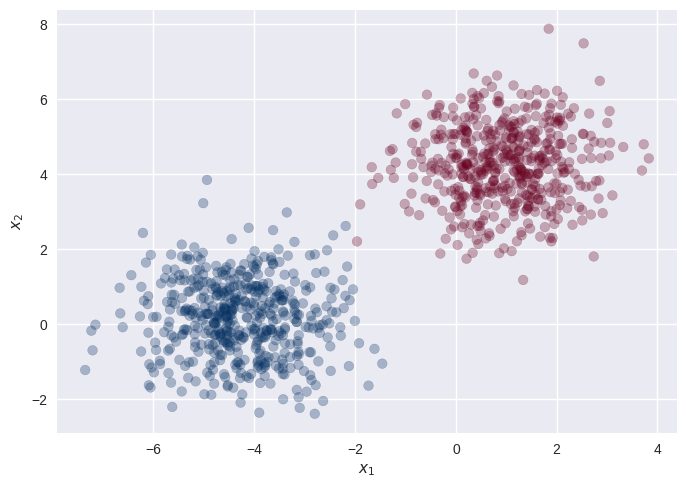

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

$$
P(\mathbf{y}|\mathbf{x}) = \frac{P(\mathbf{y})P(\mathbf{x} | \mathbf{y})}{P(\mathbf{x})}\\
P(\mathbf{x}) = \sum_{y_i}P(\mathbf{y} = y_i)P(\mathbf{x}|\mathbf{y} = y_i)
$$

In [10]:
edades = [19, 21, 20, 23, 22, 19, 21, 22, 23, 21, 23, 20]

In [11]:
mean = np.mean(edades)
std = np.std(edades)

In [12]:
mean

21.166666666666668

In [13]:
std

1.4043582955293932

In [15]:
def normal_pdf(x: ArrayLike, mean: float, std: float) -> ArrayLike:
    return (
        (1 / (std * np.sqrt(2 * np.pi))) *
        np.exp(-0.5 * ((x - mean) / std) ** 2)
    )

In [16]:
x = np.linspace(15, 28, 100)
pdf = normal_pdf(x, mean, std)

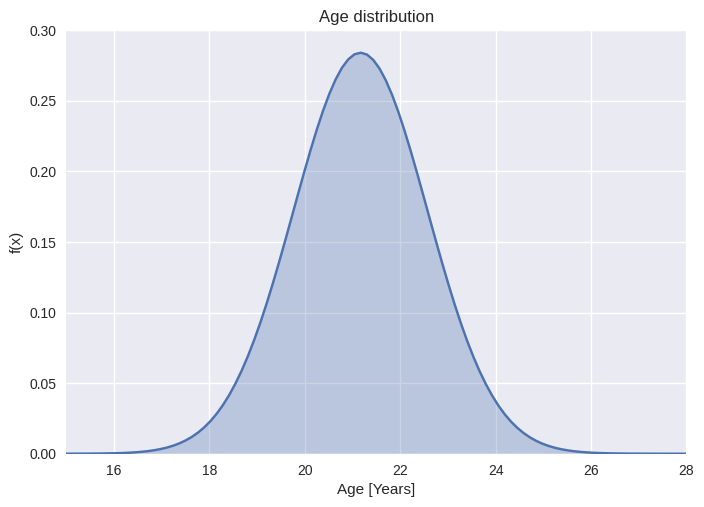

In [24]:
fig, ax = plt.subplots()
ax.plot(x, pdf)
ax.fill_between(x, np.zeros_like(x), pdf, alpha=0.3)
ax.set(
    title="Age distribution", xlabel="Age [Years]", ylabel="f(x)",
    xlim=[15, 28], ylim=[0, 0.3]
    );

In [26]:
dist = stats.norm(loc=mean, scale=std)

$$
CDF(x_i) = P(\mathbf{X} < x_i)
$$

In [27]:
dist.cdf(21)

0.45276516771430925

In [28]:
dist.cdf(30)

0.9999999998412085

In [29]:
dist.cdf(20)

0.20305823910977827

In [30]:
dist.cdf(15)

5.63913669984182e-06

In [31]:
X

array([[-3.13905951, -0.52526094],
       [ 1.50330212,  5.17319815],
       [ 1.58766126,  5.53800785],
       ...,
       [-4.27189387, -2.08734691],
       [ 2.12414555,  5.28234711],
       [-5.96660176, -0.49015307]])

In [33]:
df = (
    pd.DataFrame(
        data=X, columns=["x1", "x2"]
    )
    .assign(y=y)
)

In [34]:
df

,x1,x2,y
0,-3.139060,-0.525261,1
1,1.503302,5.173198,0
2,1.587661,5.538008,0
3,-0.643224,4.182266,0
4,1.143253,6.356720,0
...,...,...,...
995,-5.148681,1.444668,1
996,1.410826,4.370128,0
997,-4.271894,-2.087347,1
998,2.124146,5.282347,0


In [44]:
mean_1 = (
    df.query("y == 1")
    .drop(columns=["y"])
    .mean()
    .to_numpy()
)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

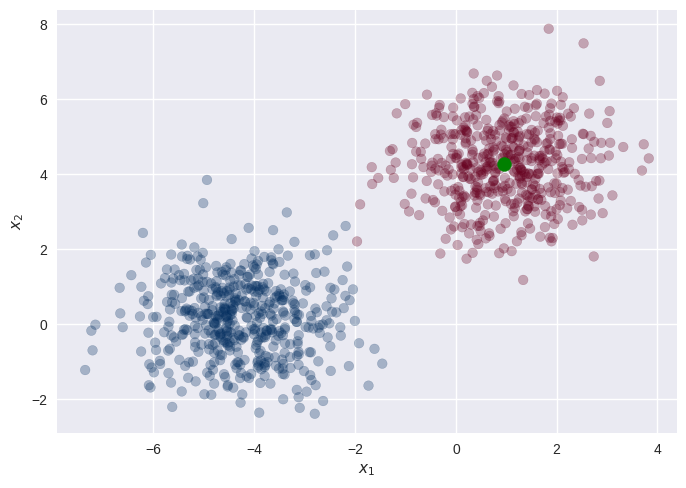

In [45]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3)
ax.scatter(mean_1[0], mean_1[1], c="g", s=100)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [51]:
means = (
    df # datos
    .groupby("y") # agrupamos sobre valores de y
    .mean() # promedio por grupo
    .reset_index()
    .drop(columns=["y"])
    .to_numpy()
)

In [52]:
means

array([[ 0.95160892,  4.25763997],
       [-4.27898475,  0.16723109]])

In [69]:
def compute_cov(df: DataFrame) -> ArrayLike:
    cov = np.cov(
        df
        .filter(regex=r"^x\d$")
        .to_numpy()
        .T
        )[np.newaxis]
    return cov

In [72]:
covs = np.concatenate(
    df # datos
    .groupby("y") # agrupamos sobre valores de y
    .apply(compute_cov)
    .to_list(),
    axis=0
)

In [73]:
covs

array([[[ 0.9571175 ,  0.04008622],
        [ 0.04008622,  1.07021804]],

       [[ 1.01409879, -0.04785615],
        [-0.04785615,  1.02277567]]])

In [75]:
dists = [
    stats.multivariate_normal(mean=means[i], cov=covs[i])
    for i in [0, 1]
]

In [84]:
x1 = np.linspace(-8, 5, 100)
x2 = np.linspace(-3, 9, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
pdf = dists[1].pdf(X_grid).reshape(X1.shape)

In [85]:
X1.shape

(100, 100)

In [86]:
X2.shape

(100, 100)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

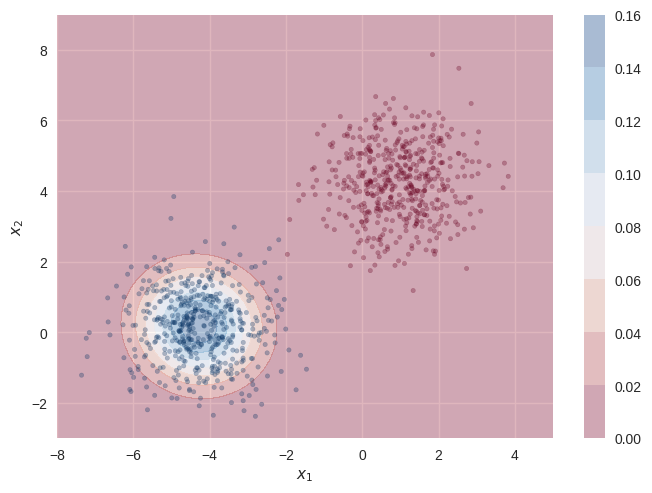

In [88]:
fig, ax = plt.subplots()
cont = ax.contourf(X1, X2, pdf, cmap="RdBu", alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3, s=10)
fig.colorbar(cont)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [90]:
def predict(x: ArrayLike, likelihood: List, priors: ArrayLike) -> ArrayLike:
    like0 = likelihood[0].pdf(x)
    like1 = likelihood[1].pdf(x)
    return priors[1] * like1 / (priors[0] * like0 + priors[1] * like1)

In [91]:
x = np.array([
    [2., 4.],
    [-4., -2]
])

In [92]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

In [93]:
predict(x, dists, np.array([0.5, 0.5]))

array([1.56801149e-12, 1.00000000e+00])

In [94]:
y_pred = predict(X_grid, dists, np.array([.5, .5]))

In [95]:
y_pred = y_pred.reshape(X1.shape)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

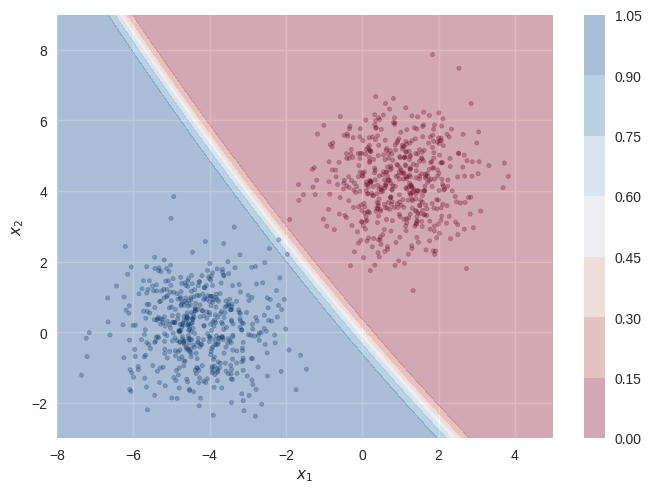

In [96]:
fig, ax = plt.subplots()
cont = ax.contourf(X1, X2, y_pred, cmap="RdBu", alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3, s=10)
fig.colorbar(cont)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [98]:
model = GaussianNB().fit(X, y)

In [103]:
y_pred = model.predict_proba(X_grid)[:, 1].reshape(X1.shape)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

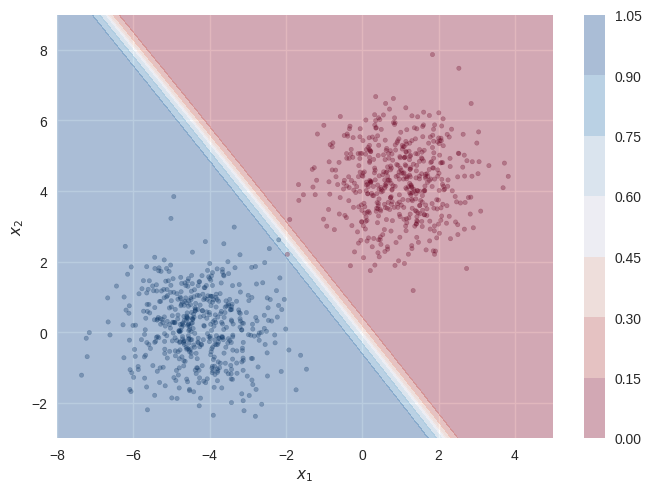

In [104]:
fig, ax = plt.subplots()
cont = ax.contourf(X1, X2, y_pred, cmap="RdBu", alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", alpha=0.3, s=10)
fig.colorbar(cont)
ax.set(xlabel="$x_1$", ylabel="$x_2$")